# Preparations

In [9]:
# All code is written in Python 3.11.5, and the necessary libraries are imported below.
# Data handling and analysis libraries
import numpy as np
import pandas as pd
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # For genearting word clouds from text data
# Text processing and feature extraction libraries
import re # For regular expressions operations
from collections import Counter # For counting frequency of words in text
import string # For accessing standard string operations
from string import punctuation # For accessing punctuation marks
from langdetect import detect # For detecting language in a given text
from unidecode import unidecode # For converting Unicode text to ASCII
from sklearn.feature_extraction.text import TfidfVectorizer # For converting text data into TF-IDF feature vectors
# Natural Language Processing (NLP) libraries
import nltk # For various NLP tasks
nltk.download('punkt') 
from nltk.tokenize import word_tokenize, sent_tokenize # For splitting text into words and sentences
from nltk.corpus import wordnet # For accessing WordNet lexical database
from nltk.corpus import words # For accessing list of English words
from nltk.corpus import stopwords # For filtering out common stopwords in text
from nltk.stem import WordNetLemmatizer # Fore lemmatizing words to their base or dictionary form
from nltk import pos_tag # For part-of-speech tagging

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gulyagurbanova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/processed_reviews_first.csv')

In [5]:
df['comments'].head(10)

0    a fantastic apartment which is beautifully fur...
1    we had the most amazing stay at host's place. ...
2    i booked host's apartment as a surprise for my...
3    i've stayed at host's place many times. so com...
4    such a fabulous apartment in a brilliant locat...
5    the photos do not do this beautiful georgian h...
6    amazing apartment and host was super helpful w...
7    great location, comfortable and full of charac...
8    sometimes airbnb can be deceiving. every place...
9    this place is fantastic. good location, lovely...
Name: comments, dtype: object

# Stop-Word Removal

In [6]:
# Starting with computing TF-IDF scores to evaluate the importance of words in the 'comments' column
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['comments'])
tfidf_scores = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out())

# Calculating the mean TF-IDF score for each word across all reviews
mean_tfidf_scores = tfidf_scores.mean(axis=1)

# Sorting words by their mean TF-IDF scores (ascending order) to review less important words
sorted_tfidf = mean_tfidf_scores.sort_values()
lowest_tfidf_words = sorted_tfidf.head(200)
print("Words with the lowest TF-IDF scores:")
print(lowest_tfidf_words)

# Saving these words to a CSV file to manually review them
lowest_tfidf_words.to_csv('low_tfidf_words.csv', header=['TF-IDF Score'])

Words with the lowest TF-IDF scores:
huang        1.748506e-07
overusing    1.748506e-07
diao         1.748506e-07
cha          1.748506e-07
zhang        1.748506e-07
                 ...     
calida       4.113307e-07
duda         4.113307e-07
ademas       4.113307e-07
desayuno     4.113307e-07
huespedes    4.113307e-07
Length: 200, dtype: float64


In [10]:
# Ensuring that the words corpus is downloaded
nltk.download('words')

# Set of English words being prepared
english_words = set(nltk.corpus.words.words())

# Defining a function to filter out non-English words from text
def keep_english_words(text):
    detected_language = detect(text)
    if detected_language != 'en':
        return ''  # Returns an empty string if the detected language is not English

    # Split the text into words, remove punctuation, and keep only English words
    words_in_text = text.split()
    english_only = [word for word in words_in_text if word.strip(string.punctuation) in english_words]
    
    return ' '.join(english_only) # Joins the filtered words back into a single string

# Applying the function to the 'comments' column to keep only English words
df['comments'] = df['comments'].apply(keep_english_words)

[nltk_data] Downloading package words to
[nltk_data]     /Users/gulyagurbanova/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [11]:
df['comments'].head(50)

0     a fantastic apartment which is beautifully fur...
1     we had the most amazing stay at place. the do ...
2     i booked apartment as a surprise for my birthd...
3     stayed at place many times. so comfortable, cl...
4     such a fabulous apartment in a brilliant locat...
5     the do not do this beautiful home justice! ver...
6     amazing apartment and host was super helpful w...
7     great location, comfortable and full of charac...
8     sometimes can be deceiving. every place profes...
9     this place is fantastic. good location, lovely...
10    host apartment was absolutely lovely. it is ve...
11    very well spacious apartment in great location...
12    you will be wise to choose this venue for your...
13    lovely apartment in a great location. the host...
14    place is a gorgeous, ideally situated base for...
15    fantastic apartment in a very central location...
16    our second stay at this wonderful apartment. l...
17    the apartment is stunning, and host could 

In [12]:
# Computing TF-IDF scores again, to analyze the impact of non-English word removal
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['comments'])
tfidf_scores = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out())
mean_tfidf_scores = tfidf_scores.mean(axis=1)
sorted_tfidf = mean_tfidf_scores.sort_values()
lowest_tfidf_words = sorted_tfidf.head(200)
print("Words with the lowest TF-IDF scores:")
print(lowest_tfidf_words)
lowest_tfidf_words.to_csv('low_tfidf_words_new.csv', header=['TF-IDF Score'])

Words with the lowest TF-IDF scores:
cha          2.289514e-07
persona      3.781220e-07
sera         3.781220e-07
bocca        3.781220e-07
visto        3.781220e-07
                 ...     
carer        1.082404e-06
distaste     1.082404e-06
vitriolic    1.082404e-06
foster       1.082404e-06
hacking      1.089747e-06
Length: 200, dtype: float64


In [13]:
# Identifying low TF-IDF words based on a predefined threshold
threshold = 0.000001 
low_tfidf_words = sorted_tfidf[sorted_tfidf <= threshold].index.tolist()
print(f"Number of low TF-IDF words identified: {len(low_tfidf_words)}")

Number of low TF-IDF words identified: 155


In [14]:
# Extending the stopword list to include the low TF-IDF words and custom words
custom_stopwords = set(stopwords.words('english')).union(set(low_tfidf_words))
custom_stopwords.update(['edinburgh', 'stay', 'airbnb'])

# Function to remove stopwords but keep punctuation and original casing (as it was done before)
def remove_stop_words(text, stop_words):
    words = text.split()  # Splitting the text by whitespace only
    filtered_words = [word for word in words if word.strip(string.punctuation) not in stop_words]
    return ' '.join(filtered_words)

# Applying the function to processed dataframe
df['comments'] = df['comments'].apply(lambda x: remove_stop_words(x, custom_stopwords))

# Displaying the cleaned comments after removing stopwords
print(df[['comments']].head())

                                            comments
0  fantastic apartment beautifully furnished thro...
1  amazing place. justice! spotlessly clean, huge...
2  booked apartment surprise birthday visiting ho...
3  stayed place many times. comfortable, clean pe...
4  fabulous apartment brilliant location thoughtf...


# Lemmatization

In [15]:
# Ensuring that the necessary NLTK corpora are downloaded for lemmatization and Part-Of-Speech(POS) tagging
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initializing the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags for more accurate lemmatization
def get_wordnet_pos(word):
  """Map POS tag to first character lemmatize() accepts J(adj), N(noun), V(verb), R(adv)"""
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize text using the POS tags
def lemmatize_text(text):
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
  return ' '.join(lemmatized_words)

# Applying the lemmatization function to the 'comments' column
df['comments'] = df['comments'].apply(lemmatize_text)

# Fixing common errors related to apostrophes after lemmatization
df["comments"] = df["comments"].str.replace(" '","'", regex = False)
df["comments"] = df["comments"].str.replace("' s","'s", regex =False)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gulyagurbanova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gulyagurbanova/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
# Inspecting the results
df['comments'].head(50)

0     fantastic apartment beautifully furnish throug...
1     amaze place . justice ! spotlessly clean , hug...
2     book apartment surprise birthday visit host to...
3     stayed place many time . comfortable , clean p...
4     fabulous apartment brilliant location thoughtf...
5     beautiful home justice ! comfortable bed kitch...
6     amaze apartment host super helpful minute walk...
7     great location , comfortable full character cu...
8     sometimes deceive . every place professional t...
9     place fantastic . good location , lovely clean...
10    host apartment absolutely lovely . central tow...
11    well spacious apartment great location . descr...
12    wise choose venue apartment best location best...
13    lovely apartment great location . host fantast...
14    place gorgeous , ideally situate base convenie...
15    fantastic apartment central location quiet cos...
16    second wonderful apartment . lovely local area...
17    apartment stun , host could do u make exce

# EDA continued

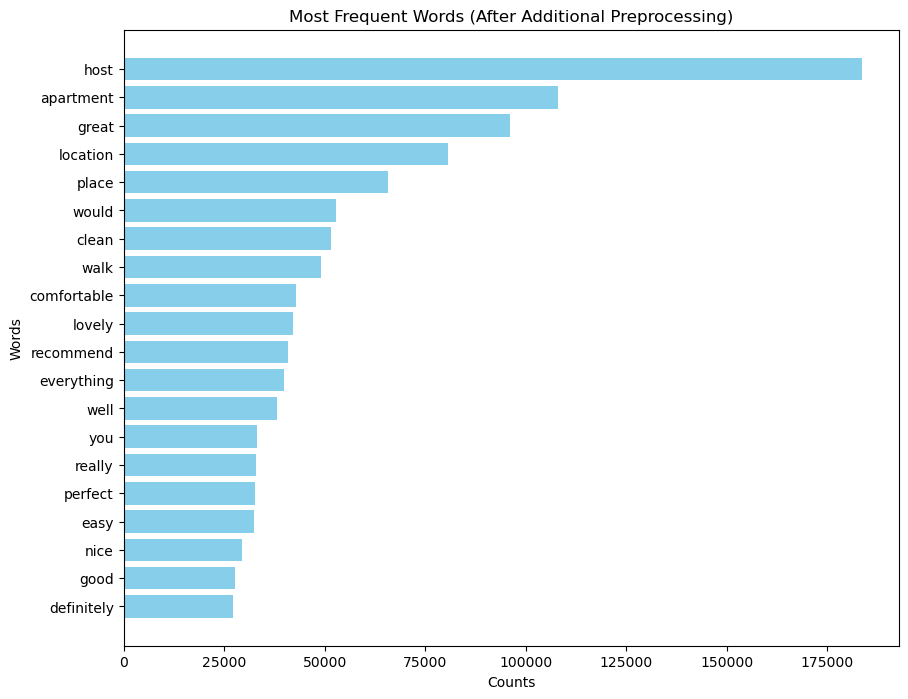

In [17]:
# Slight adjustments to the preprocessing function to handle additional cases
def preprocess_text(text):
    # Replace "u" with "you"
    text = re.sub(r'\bu\b', 'you', text)
    return text

# Applying adjustments to the entire 'comments' column
df['comments'] = df['comments'].apply(preprocess_text)

# Text preprocessing for visualization
def preprocess_text_for_vis(text):
    # Removing all punctuation from the text to clean it for visualization purposes
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Concatenate all comments into a single string to prepare the data for word frequency analysis
all_comments_for_vis = ' '.join(df['comments'].apply(preprocess_text_for_vis))

# Splitting the string into individual words
word_list_for_vis = all_comments_for_vis.split()

# Counting the frequency of each word in the cleaned text
word_freq_for_vis = Counter(word_list_for_vis)

# Identifying the most common words and their counts
most_common_words_for_vis = word_freq_for_vis.most_common(20)  
words_for_vis, counts_for_vis = zip(*most_common_words_for_vis)  # Unzips the list of tuples into two lists

# Creating a horizontal bar chart to visualize the most frequent words
plt.figure(figsize=(10, 8))
plt.barh(words_for_vis, counts_for_vis, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Most Frequent Words (After Additional Preprocessing)')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count at the top
plt.show()

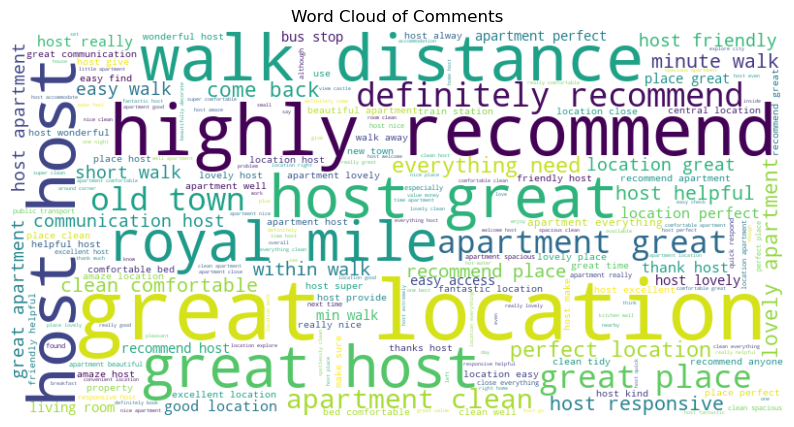

In [18]:
# Word Cloud of Comments after additional preprocessing - most frequent words in customer reviews
text = ' '.join(df['comments'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(text)

plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [19]:
# Final check on the cleaned 'comments' column
df.shape[0]

167571

In [ ]:
df.to_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/processed_reviews_second.csv', index=False)

print('Final preprocessed DataFrame has been save to data folder')

Final preprocessed DataFrame has been save to data folder
